# Optimización de Ingresos Pruebas AB para Estrategias de Marketing

## Introducción 

Como analista en una gran tienda online, tengo la oportunidad de colaborar estrechamente con el departamento de marketing para identificar y explorar estrategias que potencien nuestros ingresos. Juntos, hemos recopilado una lista de hipótesis que creemos pueden tener un impacto significativo en nuestras ventas. Mi tarea ahora es priorizar estas hipótesis, diseñar un test A/B y, una vez implementado, analizar los resultados para determinar qué enfoques funcionan mejor. 

## Descripción de los datos

### Primera parte. 

Hypotheses: breves descripciones de las hipótesis.

Reach: alcance del usuario, en una escala del uno a diez.

Impact: impacto en los usuarios, en una escala del uno al diez.

Confidence: confianza en la hipótesis, en una escala del uno al diez.

Effort: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. Cuanto mayor sea el valor Effort, más recursos requiere la prueba.

### Segunda parte.

/datasets/orders_us.csv

transactionId: identificador de pedido.

visitorId: identificador del usuario que realizó el pedido.

date: fecha del pedido.

revenue: ingresos del pedido.

group: el grupo del test A/B al que pertenece el usuario.


/datasets/visits_us.csv

date: la fecha.

group: grupo de la prueba A/B.

visits: el número de visitas en la fecha especificada en el grupo de pruebas A/B especificado.

## Procesamiento de datos 

In [108]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import ttest_ind



In [43]:
hypotheses_df = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders_df = pd.read_csv('/datasets/orders_us.csv')
visits_df = pd.read_csv('/datasets/visits_us.csv')

In [44]:
hypotheses_df.columns = hypotheses_df.columns.str.lower()

In [45]:
hypotheses_df.head(10) 

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [46]:
orders_df.head(10) 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


In [47]:
orders_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [48]:
orders_df['date'] = pd.to_datetime(orders_df['date'])

In [49]:
(orders_df['group'] == 'A').sum()


557

In [50]:
orders_df['visitorId'].duplicated().sum() 

166

In [51]:
orders_df = orders_df.drop_duplicates(subset='visitorId')

In [52]:
orders_df['visitorId'].duplicated().sum() 

0

In [53]:
visits_df.head() 

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [54]:
visits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [55]:
visits_df['date'] = pd.to_datetime(visits_df['date'])

## Priorizar hipotesis 

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda online con Reach, Impact, Confidence y Effort especificados para cada una.

Se deberá hacer: 
           
1. Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

2. Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

3. Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. 

Proporcionar una explicación de los cambios.

### Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [56]:
hypotheses_df ['ICE'] = hypotheses_df['confidence'] / hypotheses_df['effort']
print(hypotheses_df[['hypothesis','ICE']].sort_values(by= 'ICE', ascending= False))

                                          hypothesis       ICE
6  Show banners with current offers and sales on ...  2.666667
2  Add product recommendation blocks to the store...  2.333333
8  Launch a promotion that gives users discounts ...  1.800000
7  Add a subscription form to all the main pages....  1.600000
0  Add two new channels for attracting traffic. T...  1.333333
4  Change the background color on the main page. ...  1.000000
5  Add a customer review page. This will increase...  0.666667
1  Launch your own delivery service. This will sh...  0.400000
3  Change the category structure. This will incre...  0.375000


### Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [57]:
hypotheses_df ['RICE'] = hypotheses_df['reach'] * hypotheses_df['impact'] * hypotheses_df['confidence']/ hypotheses_df['effort']
print (hypotheses_df[['hypothesis','RICE']].sort_values(by='RICE', ascending = False))

                                          hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


### Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE.

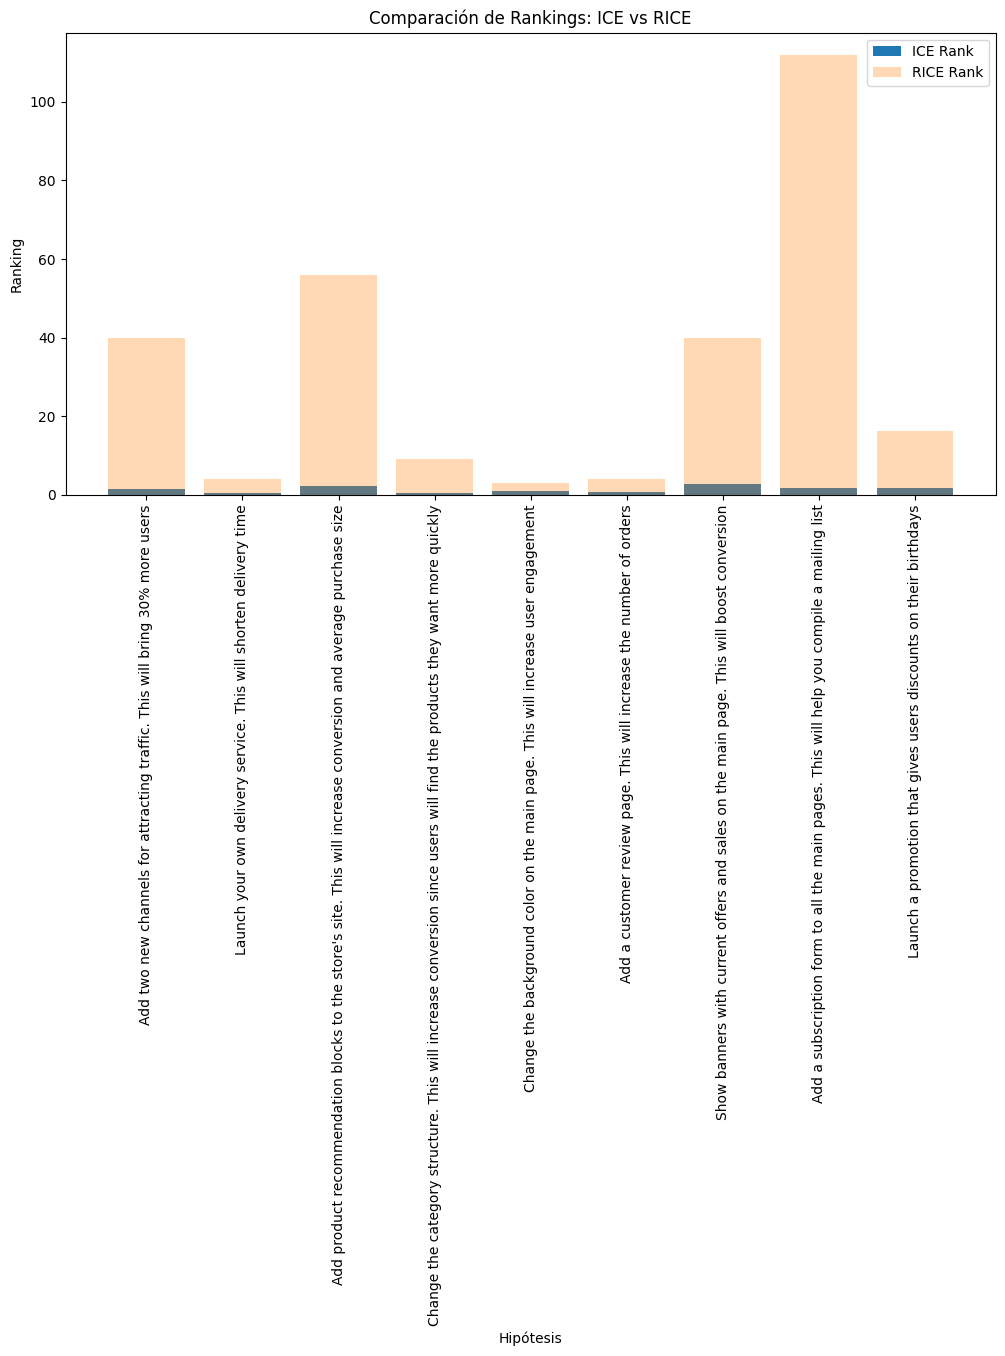

In [58]:
plt.figure(figsize=(12, 6))
plt.bar(hypotheses_df['hypothesis'], hypotheses_df['ICE'], label='ICE Rank')
plt.bar(hypotheses_df['hypothesis'], hypotheses_df['RICE'], alpha=0.3, label='RICE Rank')
plt.xlabel('Hipótesis')
plt.ylabel('Ranking')
plt.title('Comparación de Rankings: ICE vs RICE')
plt.legend()
plt.xticks(rotation=90)
plt.show()

La principal diferencia entre ICE y RICE es que RICE incluye el alcance (Reach) como un factor crítico. Esto significa que RICE prioriza hipótesis que pueden afectar a un mayor número de usuarios, lo cual es esencial en una tienda online donde el volumen de usuarios puede multiplicar el impacto de una iniciativa.

Las diferencias en la priorización indican que algunas hipótesis que podrían tener un buen rendimiento en términos de impacto y esfuerzo (como "Add a subscription form" o "Add product recommendation blocks") pueden no destacarse tanto en ICE si su alcance no se considera. Por otro lado, algunas hipótesis pueden parecer más atractivas en ICE simplemente porque tienen un alto impacto/eficacia para un grupo pequeño, pero en realidad no beneficiarán a muchos usuarios.

## Análisis del test A/B
Realizaste una prueba A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visits_us.csv.

Ejercicio

Analiza el test A/B:

Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.

Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas. 

In [59]:
ingresos_diarios = orders_df.groupby(['date', 'group'])['revenue'].sum().reset_index()

ingresos_diarios['cumulative_revenue'] = ingresos_diarios.groupby('group')['revenue'].cumsum()

In [60]:
ingresos_diarios 

,date,group,revenue,cumulative_revenue
0,2019-08-01,A,1950.0,1950.0
1,2019-08-01,B,1484.7,1484.7
2,2019-08-02,A,1198.1,3148.1
3,2019-08-02,B,2522.8,4007.5
4,2019-08-03,A,1815.2,4963.3
...,...,...,...,...
57,2019-08-29,B,2282.8,77066.4
58,2019-08-30,A,663.6,55257.3
59,2019-08-30,B,3286.8,80353.2
60,2019-08-31,A,848.3,56105.6


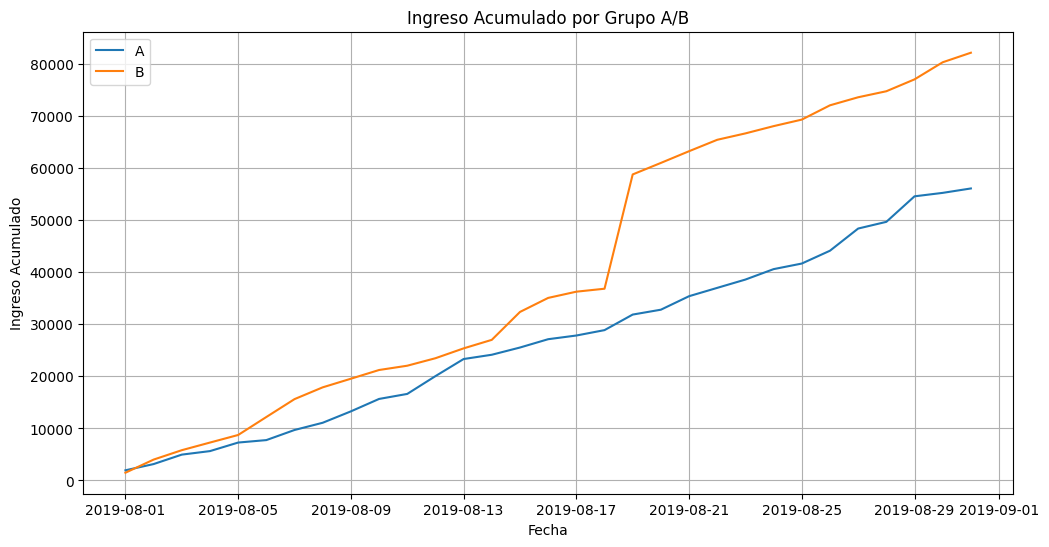

In [61]:
plt.figure(figsize=(12, 6))
for group in ingresos_diarios['group'].unique():
    subset = ingresos_diarios[ingresos_diarios['group'] == group]
    plt.plot(subset['date'], subset['cumulative_revenue'], label=group)

plt.title('Ingreso Acumulado por Grupo A/B')
plt.xlabel('Fecha')
plt.ylabel('Ingreso Acumulado')
plt.legend()
plt.grid()
plt.show()


Se puede observar que elgrupo B tiene mayores ingresos acumulados que el grupo A.  Además, entre el 17 y 21 de agosto, el grupo Btiene un aumento mucho más volatil

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [62]:

orders_date = orders_df.groupby(['date', 'group'])['revenue'].sum().reset_index()
quantity_orders = orders_df.groupby(['date', 'group'])['transactionId'].count().reset_index()


orders_total = pd.merge(orders_date, quantity_orders, on=['date', 'group'], suffixes=('_revenue', '_count'))

orders_total['average_order_size'] = orders_total['revenue'] / orders_total['transactionId']

orders_total['cumulative_average_order_size'] = orders_total.groupby('group')['average_order_size'].cumsum()


In [63]:
orders_total

,date,group,revenue,transactionId,average_order_size,cumulative_average_order_size
0,2019-08-01,A,1950.0,19,102.631579,102.631579
1,2019-08-01,B,1484.7,20,74.235000,74.235000
2,2019-08-02,A,1198.1,17,70.476471,173.108050
3,2019-08-02,B,2522.8,22,114.672727,188.907727
4,2019-08-03,A,1815.2,24,75.633333,248.741383
...,...,...,...,...,...,...
57,2019-08-29,B,2282.8,16,142.675000,4242.286487
58,2019-08-30,A,663.6,9,73.733333,3524.421105
59,2019-08-30,B,3286.8,21,156.514286,4398.800773
60,2019-08-31,A,848.3,8,106.037500,3630.458605


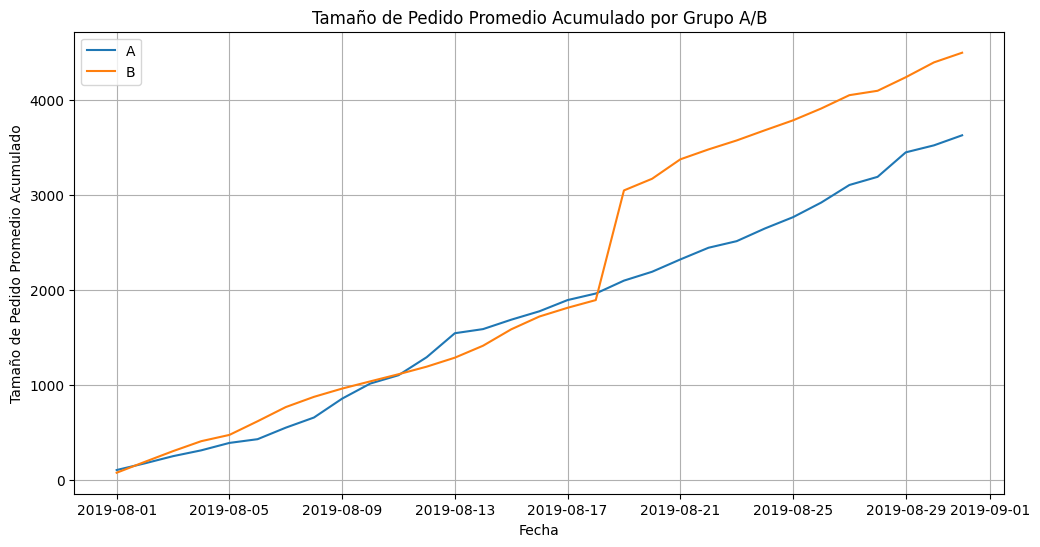

In [64]:
plt.figure(figsize=(12, 6))
for group in orders_total['group'].unique():
    subset = orders_total[orders_total['group'] == group]
    plt.plot(subset['date'], subset['cumulative_average_order_size'], label=group)

plt.title('Tamaño de Pedido Promedio Acumulado por Grupo A/B')
plt.xlabel('Fecha')
plt.ylabel('Tamaño de Pedido Promedio Acumulado')
plt.legend()
plt.grid()
plt.show()


Vemos que el tamaño de pedidos entre los grupos inicia siendo similar hasta el periodo entre el 17 al 21 de agosto, donde el grupo B vuelve aumentar de manera volatil el tamaño promedio del pedido. 

### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

In [65]:
group_a = orders_total[orders_total['group'] == 'A'][['date', 'cumulative_average_order_size']]
group_b = orders_total[orders_total['group'] == 'B'][['date', 'cumulative_average_order_size']]

diference = pd.merge(group_a, group_b, on='date', suffixes=('_A', '_B'))




In [66]:
diference['relative_difference'] = (diference['cumulative_average_order_size_B'] - diference['cumulative_average_order_size_A']) / diference['cumulative_average_order_size_A'] * 100

In [67]:
diference

,date,cumulative_average_order_size_A,cumulative_average_order_size_B,relative_difference
0,2019-08-01,102.631579,74.235000,-27.668462
1,2019-08-02,173.108050,188.907727,9.127061
2,2019-08-03,248.741383,301.832727,21.343993
3,2019-08-04,310.150474,406.597013,31.096693
4,2019-08-05,388.369521,472.724286,21.720233
5,2019-08-06,427.694521,616.661786,44.182765
6,2019-08-07,549.069521,766.035699,39.515247
7,2019-08-08,655.931060,873.869032,33.225744
8,2019-08-09,855.021969,961.037453,12.399153
9,2019-08-10,1014.188636,1037.164726,2.265465


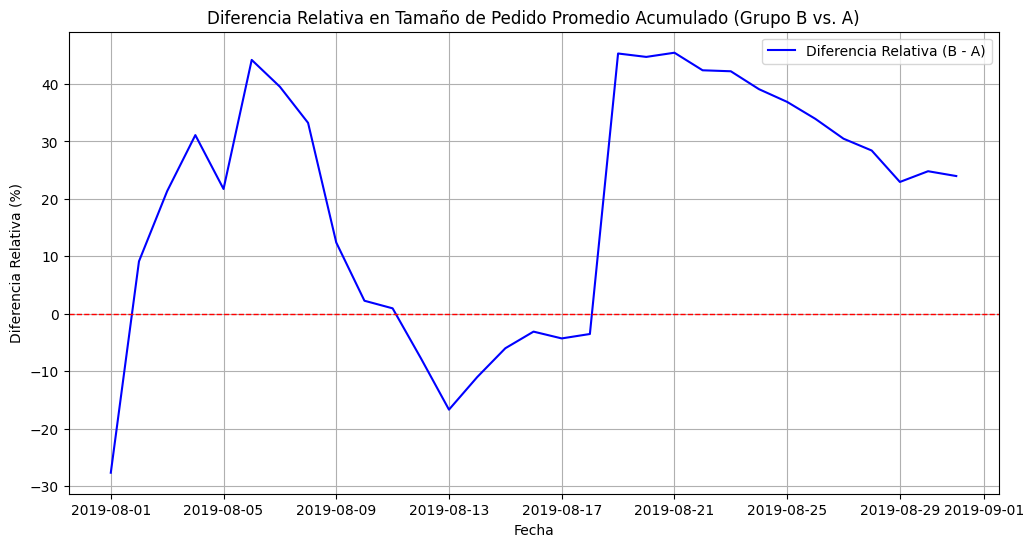

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(diference['date'], diference['relative_difference'], label='Diferencia Relativa (B - A)', color='blue')

plt.title('Diferencia Relativa en Tamaño de Pedido Promedio Acumulado (Grupo B vs. A)')
plt.xlabel('Fecha')
plt.ylabel('Diferencia Relativa (%)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Línea horizontal en 0
plt.legend()
plt.grid()
plt.show()


Es muy variada la diferencia relativa en el tamaño de los pedidos, puede ser poca o mucha, esto se puede deber a un cambio en la estrategia de marketing, promociones, o incluso estacionalidad.

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

In [69]:
orders_per_date = orders_df.groupby(['date','group'])['transactionId'].count().reset_index(name='orders') 

visits_per_date = visits_df.groupby(['date', 'group'])['visits'].sum().reset_index()

conversion = pd.merge(orders_per_date,visits_per_date,on=['date', 'group'])

conversion['conversion_rate'] = conversion['orders']/conversion['visits']

In [70]:
conversion 

,date,group,orders,visits,conversion_rate
0,2019-08-01,A,19,719,0.026426
1,2019-08-01,B,20,713,0.028050
2,2019-08-02,A,17,619,0.027464
3,2019-08-02,B,22,581,0.037866
4,2019-08-03,A,24,507,0.047337
...,...,...,...,...,...
57,2019-08-29,B,16,531,0.030132
58,2019-08-30,A,9,490,0.018367
59,2019-08-30,B,21,490,0.042857
60,2019-08-31,A,8,699,0.011445


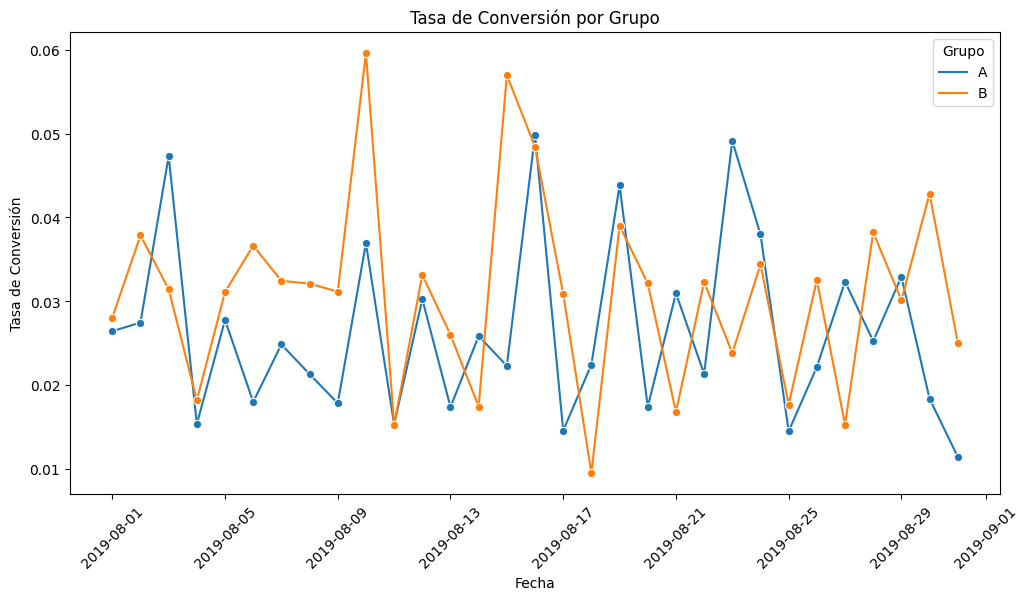

In [71]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=conversion, x='date', y='conversion_rate', hue='group', marker='o')
plt.title('Tasa de Conversión por Grupo')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')
plt.xticks(rotation=45)
plt.legend(title='Grupo')
plt.show()

Observa que, en general, el grupo B tiende a tener tasas de conversión más altas que el grupo A en varios días. Por ejemplo, el día 2 de agosto, el grupo B tuvo una tasa de conversión del 3.8% frente al 2.7% del grupo A.
Esta diferencia puede sugerir que las modificaciones realizadas en el grupo B están siendo más efectivas en convertir visitantes en compradores y una tasa de conversión más alta indica una mayor efectividad en la captación de clientes.

### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.

In [80]:
orders_per_user = orders_df.groupby('visitorId').agg({'transactionId': 'count'}).reset_index()
orders_per_user.rename(columns={'transactionId': 'orders'}, inplace=True)


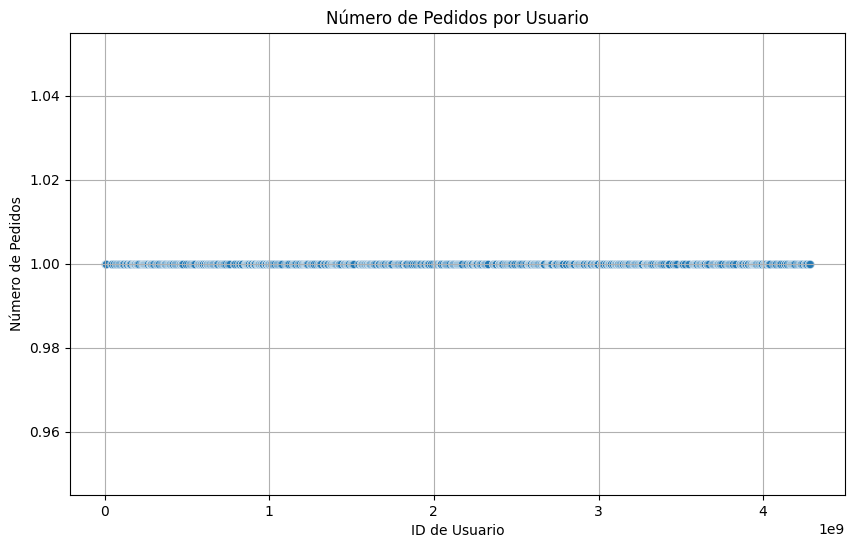

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=orders_per_user, x='visitorId', y='orders', alpha=0.6)
plt.title('Número de Pedidos por Usuario')
plt.xlabel('ID de Usuario')
plt.ylabel('Número de Pedidos')
plt.grid()
plt.show()


In [86]:
orders_df['visitorId'].nunique()

1031

Parece que los usuarios no tienden a comprar más de una vez ...

### Calcula los percentiles 95 y 99 del número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.


In [89]:
percentile_95 = orders_per_user['orders'].quantile(0.95)
percentile_99 = orders_per_user['orders'].quantile(0.99)
print(percentile_95)
print(percentile_99)

1.0
1.0


Los usuarios solo realizan una compra una vez? Sera una tienda online de carros? 

### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.


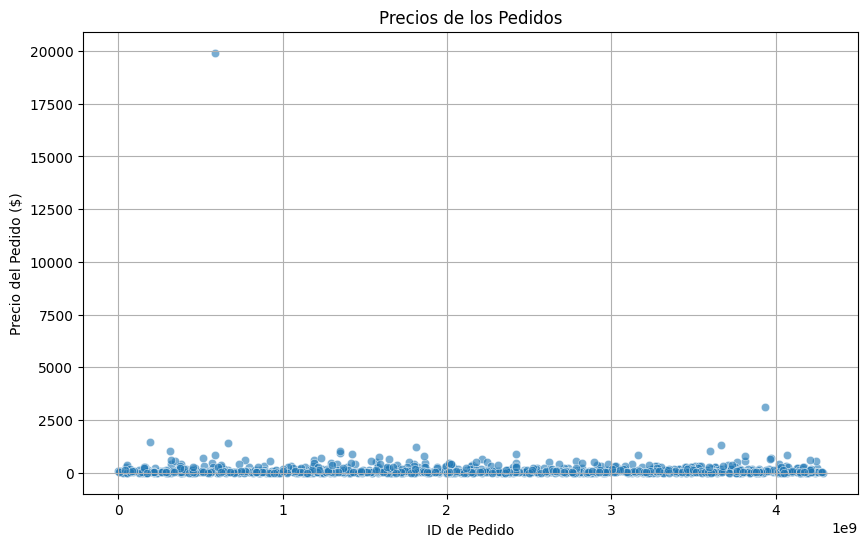

In [90]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=orders_df, x='transactionId', y='revenue', alpha=0.6)
plt.title('Precios de los Pedidos')
plt.xlabel('ID de Pedido')
plt.ylabel('Precio del Pedido ($)')
plt.grid()
plt.show()


Hay un precio muy alto que altera toda nuestra gráfica, es una anomalía, llega casi hasta los 20,000, mejor quitarla

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [96]:
percentile_95 = orders_df['revenue'].quantile(0.95)
percentile_99 = orders_df['revenue'].quantile(0.99)

print(f'el percentil 95 es de')
print(percentile_95)
print(f'el percentil 99 es de')
print(percentile_99)

el percentil 95 es de
435.6
el percentil 99 es de
896.7100000000014


Se quitaran las anomalias

In [100]:
filtered_orders = orders_df[orders_df['revenue'] <= percentile_95] 

filtered_orders = orders_df[orders_df['revenue'] <= percentile_99]



In [101]:
print(f"Número total de pedidos antes de filtrar: {len(orders_df)}")
print(f"Número de pedidos después de filtrar: {len(filtered_orders)}")


Número total de pedidos antes de filtrar: 1031
Número de pedidos después de filtrar: 1020


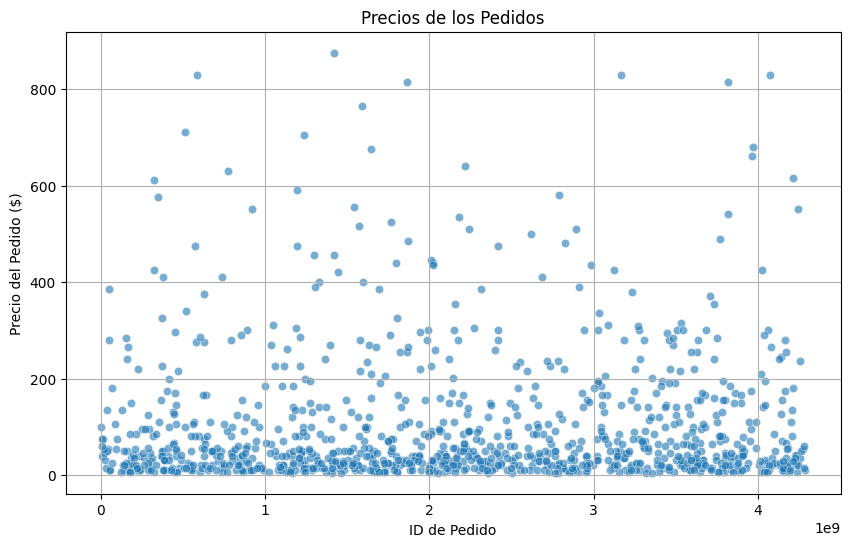

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_orders, x='transactionId', y='revenue', alpha=0.6)
plt.title('Precios de los Pedidos')
plt.xlabel('ID de Pedido')
plt.ylabel('Precio del Pedido ($)')
plt.grid()
plt.show()

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [103]:
p_A = conversion.loc[conversion['group'] == 'A', 'conversion_rate'].values[0]
p_B = conversion.loc[conversion['group'] == 'B', 'conversion_rate'].values[0]

n_A = conversion.loc[conversion['group'] == 'A', 'visits'].values[0]
n_B = conversion.loc[conversion['group'] == 'B', 'visits'].values[0]

# Número de éxitos (pedidos)
successes_A = conversion.loc[conversion['group'] == 'A', 'orders'].values[0]
successes_B = conversion.loc[conversion['group'] == 'B', 'orders'].values[0]


In [104]:
from statsmodels.stats.proportion import proportions_ztest

count = [successes_A, successes_B]
nobs = [n_A, n_B]

z_stat, p_value = proportions_ztest(count, nobs)


In [105]:
print(f'Estadístico z: {z_stat}')
print(f'Valor p: {p_value}')


Estadístico z: -0.18888585595812102
Valor p: 0.8501822793405327


como el valor p es mayor que 0.05, no hay evidencia suficiente para rechazar la hipótesis nula, lo que sugiere que no hay una diferencia significativa.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

H0= No hay diferencia significativa eb el tamaño promedio de pedido entre los grupos

H1 = hay diferencia significativa eb el tamaño promedio de pedido entre los grupos

In [106]:
average_order_size = orders_df.groupby('group').agg({'revenue': 'mean'}).reset_index()
average_order_size.rename(columns={'revenue': 'avg_order_size'}, inplace=True)


In [107]:
group_A = orders_df[orders_df['group'] == 'A']['revenue']
group_B = orders_df[orders_df['group'] == 'B']['revenue']


In [109]:
t_stat, p_value = ttest_ind(group_A, group_B, equal_var=False)  # Asumiendo varianzas desiguales
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')


Estadístico t: -0.7903000889627896
Valor p: 0.4296568963068933


debido a que el valor de p es mayor a 0.05, no hay evidencia suficiente para rechazar la hipótesis nula, sugiriendo que no hay una diferencia significativa.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

H0 = NO hay una diferencia significativa en la tasa de conversión entre los grupos A y B.

H1 = hay una diferencia significativa en la tasa de conversión entre los grupos A y B.

In [111]:
filtered_orders_count = filtered_orders.groupby('group').agg({'transactionId': 'count'}).reset_index()
filtered_orders_count.rename(columns={'transactionId': 'orders'}, inplace=True)

filtered_visits_count = visits_df.groupby('group').agg({'visits': 'sum'}).reset_index()

filtered_conversion_data = pd.merge(filtered_orders_count, filtered_visits_count, on='group')
filtered_conversion_data['conversion_rate'] = filtered_conversion_data['orders'] / filtered_conversion_data['visits']


In [112]:
p_A = filtered_conversion_data.loc[filtered_conversion_data['group'] == 'A', 'conversion_rate'].values[0]
p_B = filtered_conversion_data.loc[filtered_conversion_data['group'] == 'B', 'conversion_rate'].values[0]

n_A = filtered_conversion_data.loc[filtered_conversion_data['group'] == 'A', 'visits'].values[0]
n_B = filtered_conversion_data.loc[filtered_conversion_data['group'] == 'B', 'visits'].values[0]

successes_A = filtered_conversion_data.loc[filtered_conversion_data['group'] == 'A', 'orders'].values[0]
successes_B = filtered_conversion_data.loc[filtered_conversion_data['group'] == 'B', 'orders'].values[0]


count = [successes_A, successes_B]
nobs = [n_A, n_B]

z_stat, p_value = proportions_ztest(count, nobs)


In [113]:
print(f'Estadístico z: {z_stat}')
print(f'Valor p: {p_value}')


Estadístico z: -2.5117449116359576
Valor p: 0.01201358926324715


debido a que el valor p es menor que 0.05, rechaza la hipótesis nula y concluye que hay una diferencia significativa en la tasa de conversión entre los grupos A y B.

¿Hubo alguna variación en la publicidad, cambios en el diseño de la página o promociones específicas que pudieron haber impactado la conversión?

### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Parar la prueba, considerar a uno de los grupos como líder. 2. Parar la prueba, concluir que no hay diferencia entre los grupos. 3. Continuar la prueba.

Segun las pruebas no hubo grandes diferencias significativas entre los grupos, considerando esto, se opta por la decisión 2: Parar la prueba, concluir que no hay diferencia entre los grupos.